# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from summa import keywords
from rake_nltk import Rake
from wordcloud import WordCloud

# LOADING DATASET

In [2]:
df=pd.read_csv("survey.csv")
df.head()


Horodateur    Age  Gender  \
0  18/11/2023 15:51:44  21-24    Male   
1  18/11/2023 16:02:03  18-20  Female   
2  18/11/2023 16:02:24  21-24    Male   
3  18/11/2023 16:12:16  18-20  Female   
4  18/11/2023 16:14:09  21-24    Male   

  Field of study (e.g., Engineering, Medical, Finance...)  \
0                                 Telecommunication         
1                                       Engineering         
2                                       Engineering         
3                                        Engineering        
4                                       Engineering         

   On a scale of 1 to 10, how would you rate your overall mental health?   \
0                                                  7                        
1                                                  4                        
2                                                  3                        
3                                                  6                        
4                                                  6                        

  How often do you feel stressed? How often do you feel anxious or worried?  \
0                       Sometimes                                 Sometimes   
1                       Sometimes                                 Sometimes   
2                          Rarely                                    Rarely   
3                           Often                                     Often   
4                       Sometimes                                 Sometimes   

  How often do you feel down, depressed, or hopeless?  \
0                                              Often    
1                                          Sometimes    
2                                             Rarely    
3                                          Sometimes    
4                                             Rarely    

  Have you ever sought mental health support or counseling services during your time as a student?  \
0                                                 No                                                 
1                                                 No                                                 
2                                                 No                                                 
3                                                Yes                                                 
4                                                 No                                                 

  What factors, if any, contribute to stress or anxiety in your life as a student?  \
0                          Studies \nRelationships\n                                 
1                                                NaN                                 
2     Financial problems,  transportation, studying                                  
3                                           Failure                                  
4                                                NaN                                 

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   How would you rate how involvement in such groups influenced your social connections?  \
0                                               Good                                       
1                                             Normal                                       
2                                               Good                                       
3                                             Normal                                       
4                                               Good                                       

  How do you typically cope with challenges or setbacks in your academic and personal life?  \
0                                           Good way                                          
1                                             Normal                                          
2                                           Good way                                    

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 38 columns):
 #   Column                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                          --------------  ----- 
 0   Horodateur                                                                                                                      130 non-null    object
 1   Age                                                                                                                             130 non-null    object
 2   Gender                                                                                                                          130 non-null    object
 3   Field of study (e.g., Engineering, Medical, Finance...)                                                       

# EXPLORATORY SOME INFORMATION ABOUT DATASET

In [4]:
df.isnull().sum()

Horodateur                                                                                                                         0
Age                                                                                                                                0
Gender                                                                                                                             0
Field of study (e.g., Engineering, Medical, Finance...)                                                                            0
On a scale of 1 to 10, how would you rate your overall mental health?                                                              0
How often do you feel stressed?                                                                                                    0
How often do you feel anxious or worried?                                                                                          0
How often do you feel down, depressed, or hopeless?                  

"What factors, if any, contribute to stress or anxiety in your life as a student?" contains 31 missing values.
"Have you encountered relational difficulties recently? Please briefly describe." contains 71 missing values.  
"If yes, could you briefly describe this correlation?" contains 89 missing values.
"Based on your experiences, what recommendations do you have for improving student well-being at our institution?" contains 69 missing values.
"Is there anything else you would like to share about your overall well-being as a student?" contains 93 missing values.

In [5]:
df.describe()

On a scale of 1 to 10, how would you rate your overall mental health?   \
count                                         130.000000                        
mean                                            6.238462                        
std                                             1.928183                        
min                                             1.000000                        
25%                                             5.000000                        
50%                                             7.000000                        
75%                                             8.000000                        
max                                            10.000000                        

       On a scale of 1 to 10, how would you rate your overall physical health?   \
count                                         130.000000                          
mean                                            6.707692                          
std                                             1.635110                          
min                                             3.000000                          
25%                                             6.000000                          
50%                                             7.000000                          
75%                                             8.000000                          
max                                            10.000000                          

       How would you rate the quality of your social relationships?  \
count                                         130.000000              
mean                                            6.730769              
std                                             1.850156              
min                                             2.000000              
25%                                             6.000000              
50%                                             7.000000              
75%                                             8.000000              
max                                            10.000000              

       How would you rate your academic performance?  
count                                     130.000000  
mean                                        3.315385  
std                                         0.880756  
min                                         1.000000  
25%                                         3.000000  
50%                                         3.000000  
75%                                         4.000000  
max                                         5.000000

* Change the object type of the column values to category

In [6]:
conversion_dict={k:"category" for k in df.select_dtypes(include="object").columns}
df=df.astype(conversion_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 38 columns):
 #   Column                                                                                                                          Non-Null Count  Dtype   
---  ------                                                                                                                          --------------  -----   
 0   Horodateur                                                                                                                      130 non-null    category
 1   Age                                                                                                                             130 non-null    category
 2   Gender                                                                                                                          130 non-null    category
 3   Field of study (e.g., Engineering, Medical, Finance...)                                             

* Check for duplicates

In [7]:

duplicates = df.duplicated()

if duplicates.any():
    print("There are duplicates in the Survey.")
else:
    print("No duplicates found in the Survey.")

No duplicates found in the Survey.


## DATA VISUALIZATION

In [50]:
df['Date'] = pd.to_datetime(df['Horodateur'], errors='coerce')
df['day'] = (df['Date']).dt.day
df['month'] = (df['Date']).dt.month
df['year'] = (df['Date']).dt.year
df['hour'] = (df['Date']).dt.hour

C:\Users\la7tim\AppData\Local\Temp\ipykernel_16208\534799382.py:1: UserWarning:

Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [51]:
df.year.value_counts()

year
2023    130
Name: count, dtype: int64

In [52]:
df.day.value_counts()

day
18    86
19    15
20    11
21    10
22     3
25     3
23     2
Name: count, dtype: int64

In [53]:
fig = px.histogram(df, x="day", color="day")
fig.show()

This survey was usually done on the 18th of November.

In [54]:
fig = px.histogram(df, x="hour", color="hour")
fig.show()


This survey was usually done at the afternoon.

* Age distribution

In [8]:
df["Gender"].value_counts(normalize=True)

Gender
Female    0.630769
Male      0.369231
Name: proportion, dtype: float64

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



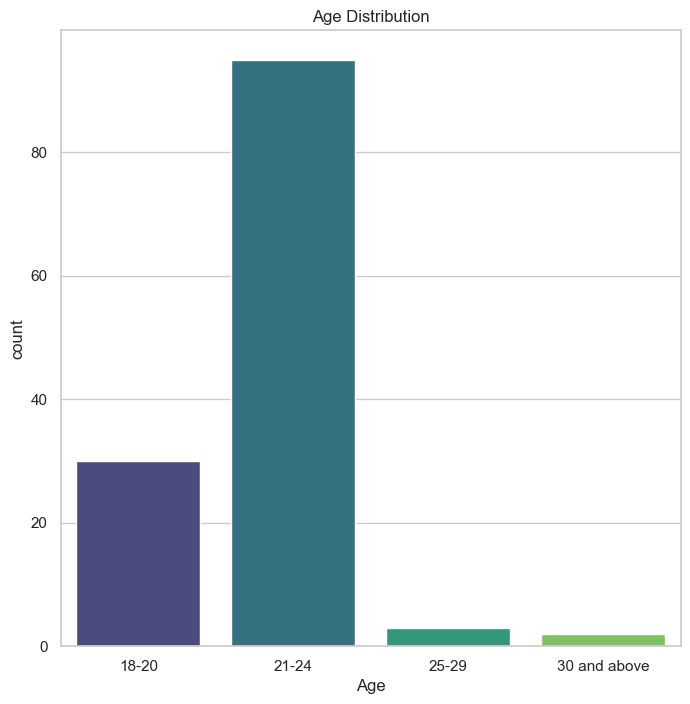

In [82]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
sns.countplot(x='Age', data=df, palette='viridis')
plt.title('Age Distribution')
plt.show()

* Gender distribution

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


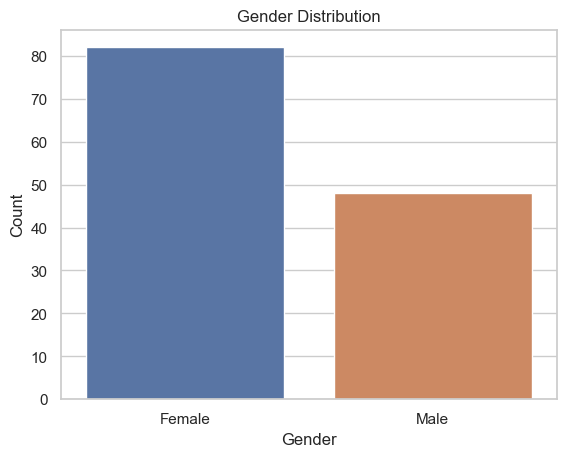

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Gender' column is categorical
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


* Grouping similar fields of study into same field

In [13]:
df["Field of study (e.g., Engineering, Medical, Finance...)"].cat.categories

Index(['Agriculture engineering, genetics and biotechnology ', 'Art student ',
       'Business', 'Business ', 'Business intelligence (IT)',
       'Chemical Engineering ', 'Civil engineering ',
       'Communication and marketing', 'Communication multimédia ',
       'Computer Science', 'Computer science ', 'Dental student', 'Dentistry',
       'ENGINEERING', 'Electrical Engineering ', 'Electrical engineering',
       'Engineeering', 'Engineering', 'Engineering ', 'Environmental Sciences',
       'FinTech Engineering', 'Finance', 'Finance /BA',
       'Gestion de technologie de l'information et communication ',
       'High school', 'High school ', 'IT', 'Law', 'Licence',
       'Mechanical engineering ', 'Medical', 'Medical ', 'Medicine ',
       'Médecin ', 'PhD in Biology', 'Pre engineering', 'Prep engineering ',
       'Telecommunication ', 'computer science', 'engeineering', 'engineering',
       'engineering ', 'enineering', 'medical', 'pre-engineering ',
       'technical '],
 

In [14]:

new_field_of_study = {
    "agriculture engineering": "ENGINEERING",
    "chemical engineering": "ENGINEERING",
    "civil engineering": "ENGINEERING",
    "engineering": "ENGINEERING",
    "electrical engineering": "ENGINEERING",
    "engineeering": "ENGINEERING",
    "fintech engineering": "ENGINEERING",
    "mechanical engineering": "ENGINEERING",
    "pre engineering": "ENGINEERING",
    "prep engineering": "ENGINEERING",
    "telecommunication": "ENGINEERING",
    "engeineering": "ENGINEERING",
    "enineering": "ENGINEERING",
    "pre-engineering": "ENGINEERING",
    "environmental sciences": "ENGINEERING",
    "genetics and biotechnology": "BIOLOGY",
    "phd in biology": "BIOLOGY",
    "business": "BUSINESS AND FINANCE",
    "business intelligence (it)": "BUSINESS AND FINANCE",
    "finance": "BUSINESS AND FINANCE",
    "finance /ba": "BUSINESS AND FINANCE",
    "communication and marketing": "DIGITAL MEDIA AND COMMUNICATION",
    "communication multimédia": "DIGITAL MEDIA AND COMMUNICATION",
    "gestion de technologie de l'information et communication": "DIGITAL MEDIA AND COMMUNICATION",
    "computer science": "IT AND COMPUTER SCIENCES",
    "it": "IT AND COMPUTER SCIENCES",
    "technical": "IT AND COMPUTER SCIENCES",
    "licence": "IT AND COMPUTER SCIENCES",
    "art student": "ART",
    "dental student": "HEALTHCARE SCIENCES",
    "dentistry": "HEALTHCARE SCIENCES",
    "medical": "HEALTHCARE SCIENCES",
    "medicine": "HEALTHCARE SCIENCES",
    "médecin": "HEALTHCARE SCIENCES",
    "law": "LAW",
    "high school": "HIGH SCHOOL"
}

df["field_of_study_clean"] = df["Field of study (e.g., Engineering, Medical, Finance...)"].str.lower().str.split(',')
df["field_of_study_clean"] = df["field_of_study_clean"].apply(lambda fields: ', '.join([new_field_of_study.get(field.strip(), field.strip()) for field in fields])).astype("category")
print(df["field_of_study_clean"].value_counts())




field_of_study_clean
ENGINEERING                        89
HEALTHCARE SCIENCES                17
BUSINESS AND FINANCE                7
IT AND COMPUTER SCIENCES            6
DIGITAL MEDIA AND COMMUNICATION     3
LAW                                 3
HIGH SCHOOL                         2
ART                                 1
BIOLOGY                             1
ENGINEERING, BIOLOGY                1
Name: count, dtype: int64


In [16]:
import pandas as pd
import plotly.express as px

# Your new_field_of_study dictionary and df preparation here...

df["field_of_study_clean"] = df["Field of study (e.g., Engineering, Medical, Finance...)"].str.lower().str.split(',')
df["field_of_study_clean"] = df["field_of_study_clean"].apply(lambda fields: ', '.join([new_field_of_study.get(field.strip(), field.strip()) for field in fields])).astype("category")

# Use value_counts() and reset_index() to create a DataFrame
value_counts_df = df["field_of_study_clean"].value_counts().reset_index()

fig = px.bar(value_counts_df, x="field_of_study_clean", y="count", color="field_of_study_clean",
             labels={"field_of_study_clean": "Field of Study", "count": "Count"},
             title="Distribution of Field of Study")

fig.update_layout(xaxis=dict(tickangle=45),
                  xaxis_title="Field of Study",
                  yaxis_title="Count")

fig.show()


C:\Users\la7tim\anaconda3\lib\site-packages\plotly\express\_core.py:1958: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers


* Use summary statistics (mean, median, mode, standard deviation) to understand the central tendency and variability of the responses.

In [17]:
descriptive_stats = df.describe()
print(descriptive_stats)


       On a scale of 1 to 10, how would you rate your overall mental health?   \
count                                         130.000000                        
mean                                            6.238462                        
std                                             1.928183                        
min                                             1.000000                        
25%                                             5.000000                        
50%                                             7.000000                        
75%                                             8.000000                        
max                                            10.000000                        

       On a scale of 1 to 10, how would you rate your overall physical health?   \
count                                         130.000000                          
mean                                            6.707692                          
std                  

## Mental Health Analysis

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



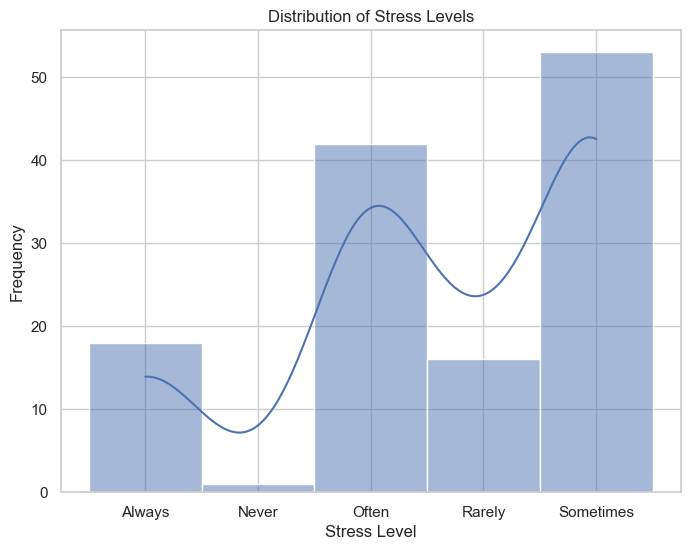

In [18]:

# Histogram for 'How often do you feel stressed?'
plt.figure(figsize=(8, 6))
sns.histplot(df['How often do you feel stressed?'], bins=10, kde=True)
plt.title('Distribution of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

* Average mental health rating for different stress levels

C:\Users\la7tim\AppData\Local\Temp\ipykernel_16208\1935950668.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



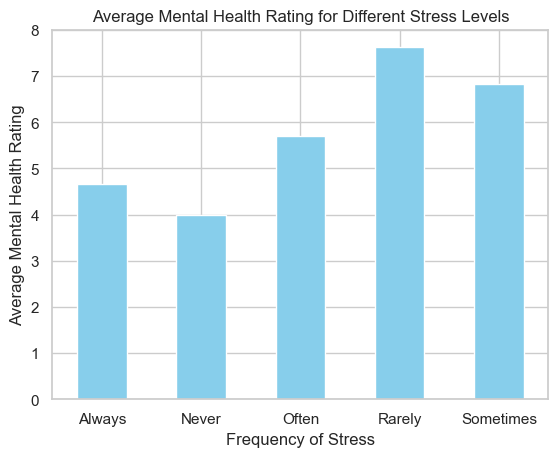

In [19]:

avg_rating_by_stress = df.groupby('How often do you feel stressed?')['On a scale of 1 to 10, how would you rate your overall mental health? '].mean()
avg_rating_by_stress.plot(kind='bar', color='skyblue')
plt.xlabel('Frequency of Stress')
plt.ylabel('Average Mental Health Rating')
plt.title('Average Mental Health Rating for Different Stress Levels')
plt.xticks(rotation=0)
plt.show()


* Average Mental Health Rating for Different Stress Levels

C:\Users\la7tim\AppData\Local\Temp\ipykernel_16208\1862096951.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



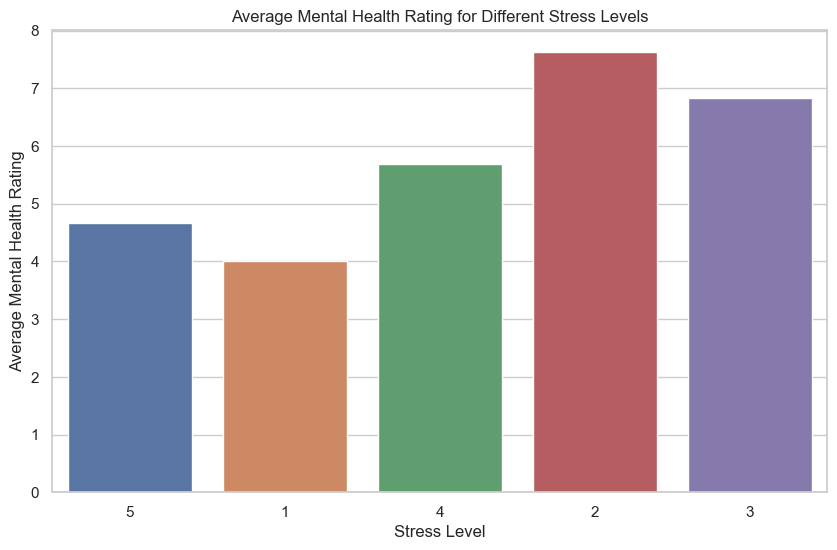

In [20]:

stress_mapping = {'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Often': 4, 'Always': 5}
df['Stress_Num'] = df['How often do you feel stressed?'].map(stress_mapping)
plt.figure(figsize=(10, 6))
sns.barplot(x='Stress_Num', y='On a scale of 1 to 10, how would you rate your overall mental health? ', data=df, ci=None)
plt.title('Average Mental Health Rating for Different Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Average Mental Health Rating')
plt.show()


* Plot a box plot to compare mental health ratings between those who sought support and those who didn't
The box plot allows us to compare the distribution of mental health ratings between those who sought support and those who didn't. We can observe whether there are differences in the median, spread, and potential outliers between the two groups. If the medians or spreads differ, it suggests that seeking mental health support might have an impact on mental health ratings


C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



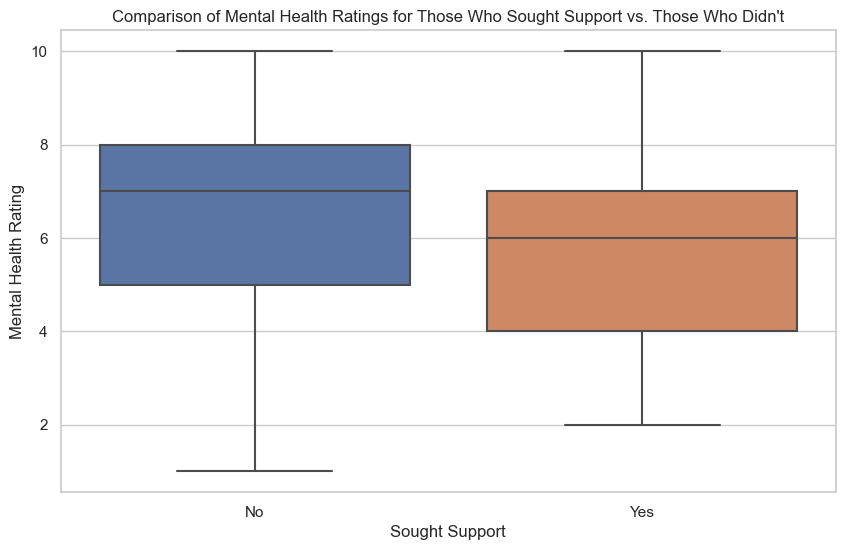

In [21]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Have you ever sought mental health support or counseling services during your time as a student?', y='On a scale of 1 to 10, how would you rate your overall mental health? ', data=df)
plt.title('Comparison of Mental Health Ratings for Those Who Sought Support vs. Those Who Didn\'t')
plt.xlabel('Sought Support')
plt.ylabel('Mental Health Rating')
plt.show()


* Factors contributing to stress or anxiety

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\la7tim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\la7tim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
from rake_nltk import Rake

responses = df['What factors, if any, contribute to stress or anxiety in your life as a student?'].dropna()

# Initialize the Rake object
r = Rake()

# Extract keywords using Rake and concatenate them
keywords_list = responses.apply(lambda x: ', '.join(r.extract_keywords_from_text(x) or r.get_ranked_phrases()))

# Create a DataFrame with concatenated keywords
keywords_df = pd.DataFrame({'Keywords': keywords_list})

# Filter keywords based on length (e.g., keep keywords with more than 3 characters)
filtered_keywords_df = keywords_df[keywords_df['Keywords'].apply(lambda x: len(x.split(', ')) > 3)]

# Print the DataFrame with filtered keywords
print(filtered_keywords_df)


                                              Keywords
8            mandatory attendance, work, makes, harder
21              seeing others, want, better, achieving
23   life far away, homework ..., chores management...
25   particular self study, worry speciality, huge ...
26       feel stressed, academic year, passing, grades
27   responsabilities affect aksi, social life, man...
30   busy studying schedule, hobbies .., dedicate t...
38        personal life, work, exams, clubs, balancing
44          internships, exams, deadlines, assignments
47   national exam last year, close class mates ove...
56   social life, balancing study, work, transporta...
58   stressful part, exams contribute, process, mai...
60          school results, always away, family, exams
62   sudden changes, permanent desire, family fight...
66   really like, memorize especially, huge mount, ...
69   system education .., right decisions personall...
72   academic subjects excessive study hours absenc...
74   publi

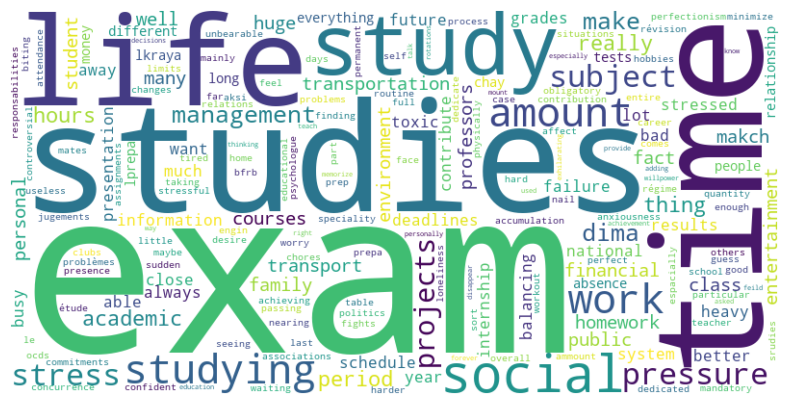

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
# Example:
# df = pd.read_csv('your_data.csv')
# or
# df = pd.DataFrame({'StudentResponses': ["I feel stressed due to exams.", "Balancing work and study is challenging."]})

responses = df['What factors, if any, contribute to stress or anxiety in your life as a student?'].dropna()

# Initialize the Rake object
r = Rake()

# Extract keywords using Rake and concatenate them
keywords_list = responses.apply(lambda x: ', '.join(r.extract_keywords_from_text(x) or r.get_ranked_phrases()))

# Concatenate all keywords into a single string
all_keywords = ', '.join(keywords_list)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [26]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\la7tim\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Cluster analysis
Cluster analysis involves grouping participants into clusters based on similarities
in their responses. In our case, we used the responses to the questions ’How often
do you feel stressed?’, ’How often do you feel anxious or worried?’, ’How often do
you feel down, depressed, or hopeless?’ to identify patterns of mental health.

Elbow Method Plot:
To determine the optimal number of clusters (k) for k-means clustering. In our case it's 3 clusters


Pairplot of Clustered Data:
To visualize the clusters and relationships between different pairs of variables.


Cluster Characteristics:
To analyze the characteristics of each cluster.




C:\Users\la7tim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\la7tim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\la7tim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\la7tim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

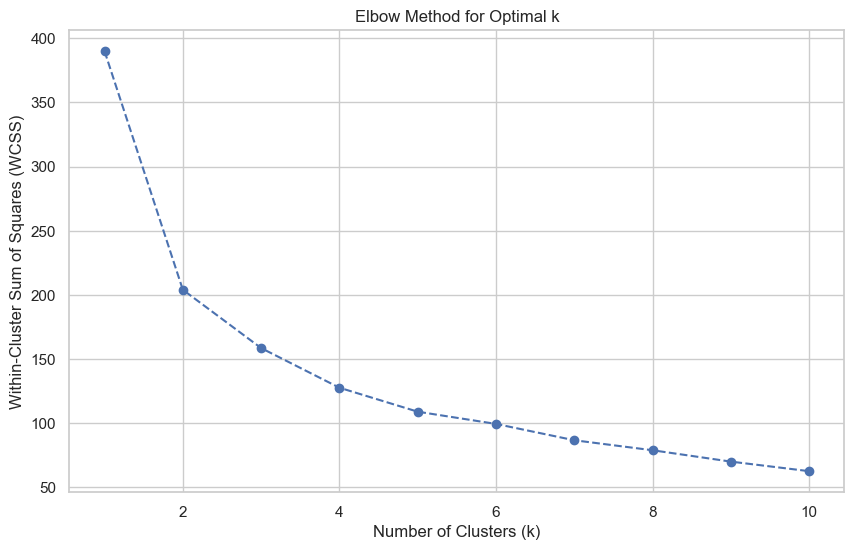

C:\Users\la7tim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_cate

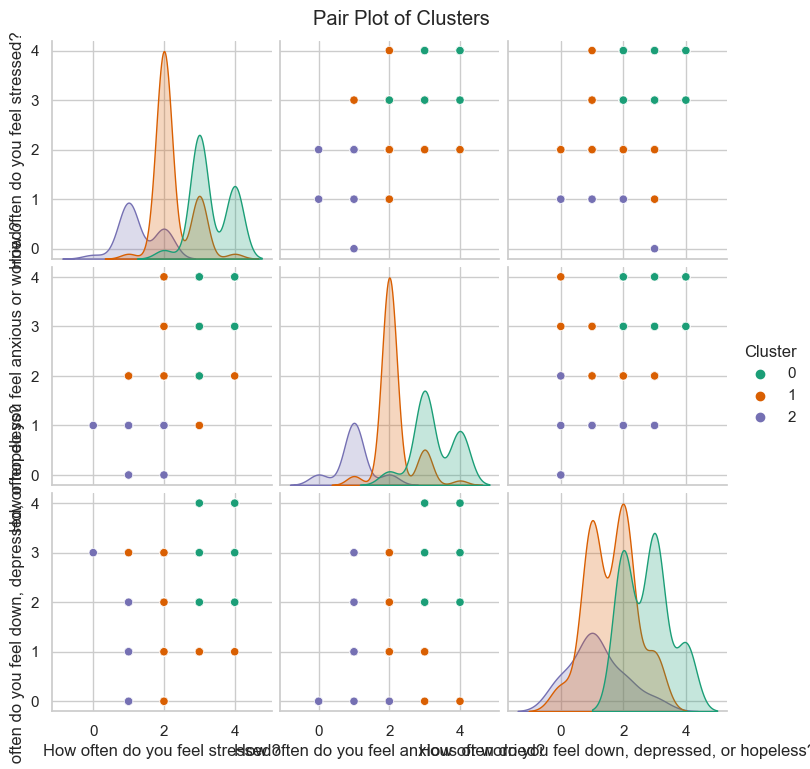

         How often do you feel stressed?  \
Cluster                                    
0                               3.312500   
1                               2.241379   
2                               1.291667   

         How often do you feel anxious or worried?  \
Cluster                                              
0                                         3.250000   
1                                         2.137931   
2                                         1.000000   

         How often do you feel down, depressed, or hopeless?  
Cluster                                                       
0                                                 2.770833    
1                                                 1.620690    
2                                                 1.166667    


In [27]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with relevant columns for analysis
# Select relevant columns for clustering
columns_for_clustering = ['How often do you feel stressed?',
                           'How often do you feel anxious or worried?',
                           'How often do you feel down, depressed, or hopeless?',
                           
                           # Add more relevant columns as needed
                          ]

# Extract the relevant data
cluster_data = df[columns_for_clustering].copy()

# Map string values to numerical values
mapping = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3, 'Always': 4}
cluster_data.replace(mapping, inplace=True)

# Handle missing values (if any)
cluster_data.fillna(0, inplace=True)  # Replace missing values with 0, you can choose a different strategy based on your data

# Ensure all columns are numeric
cluster_data = pd.to_numeric(cluster_data.stack(), errors='coerce').unstack()

# Drop rows with NaN (if any)
cluster_data.dropna(inplace=True)

# Standardize the data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cluster_data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Based on the Elbow Method, choose the optimal number of clusters (k)
# In this example, let's say k=3

# Apply k-means clustering
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_data['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Visualize the clusters with a pair plot
sns.pairplot(cluster_data, hue='Cluster', diag_kind='kde', palette='Dark2')
plt.suptitle('Pair Plot of Clusters', y=1.02)  # Add a title to the pair plot
plt.show()

# Analyze the characteristics of each cluster
cluster_means = cluster_data.groupby('Cluster').mean()
print(cluster_means)


## PHYSICAL HEALTH Analysis

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



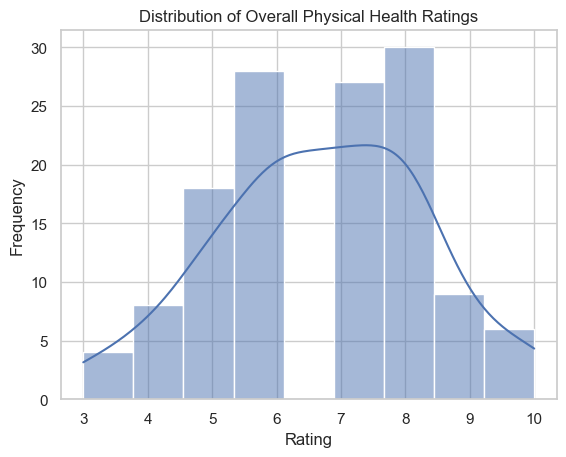

In [28]:

sns.histplot(df['On a scale of 1 to 10, how would you rate your overall physical health? '], kde=True)
plt.title('Distribution of Overall Physical Health Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


* Relationship between sleep hours and overall physical health

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



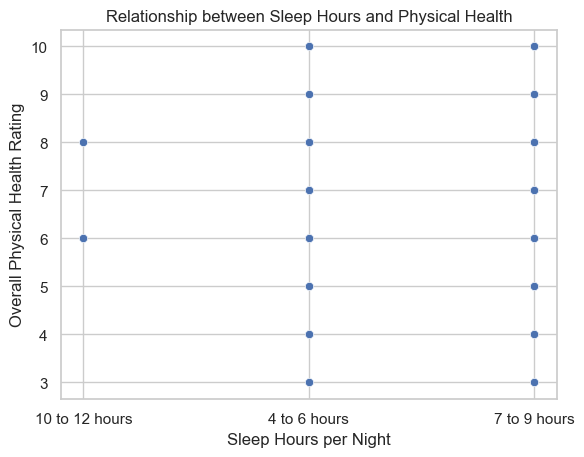

In [29]:

sns.scatterplot(x='On average, how many hours of sleep do you get per night?', y='On a scale of 1 to 10, how would you rate your overall physical health? ', data=df)
plt.title('Relationship between Sleep Hours and Physical Health')
plt.xlabel('Sleep Hours per Night')
plt.ylabel('Overall Physical Health Rating')
plt.show()


* Analyze count of existing medical conditions

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



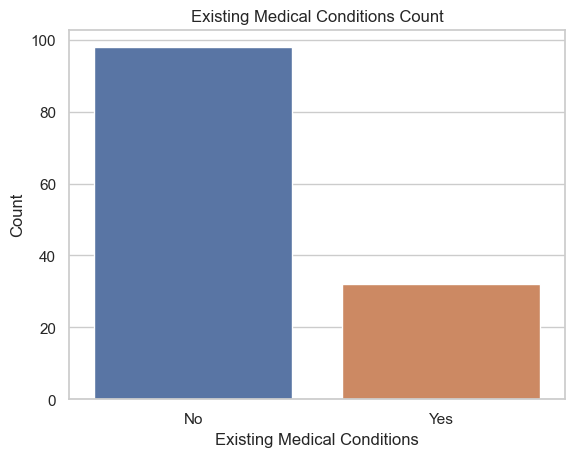

In [30]:

sns.countplot(x='Do you have any existing medical conditions that you think may impact your physical health?', data=df)
plt.title('Existing Medical Conditions Count')
plt.xlabel('Existing Medical Conditions')
plt.ylabel('Count')
plt.show()


C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



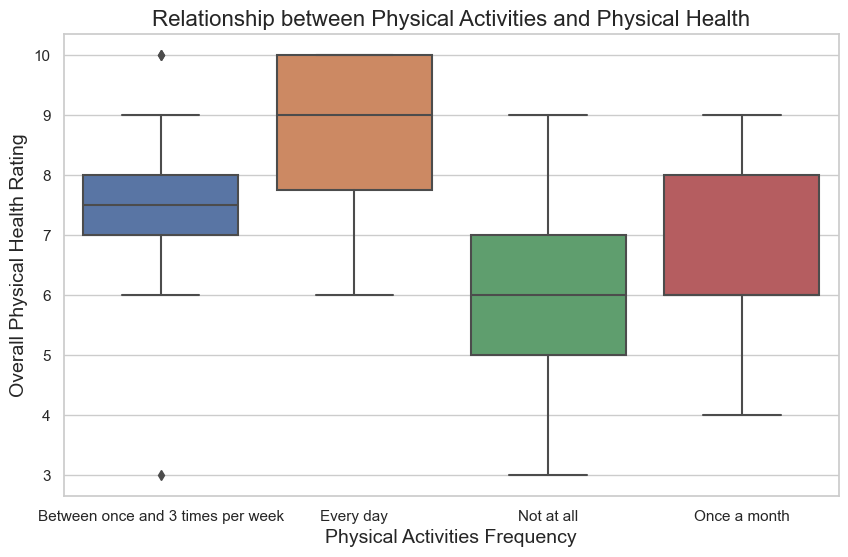

In [31]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='How often do you engage in physical activities (e.g., exercise, sports)?', y='On a scale of 1 to 10, how would you rate your overall physical health? ', data=df)
plt.title('Relationship between Physical Activities and Physical Health', fontsize=16)
plt.xlabel('Physical Activities Frequency', fontsize=14)
plt.ylabel('Overall Physical Health Rating', fontsize=14)
plt.show()


C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



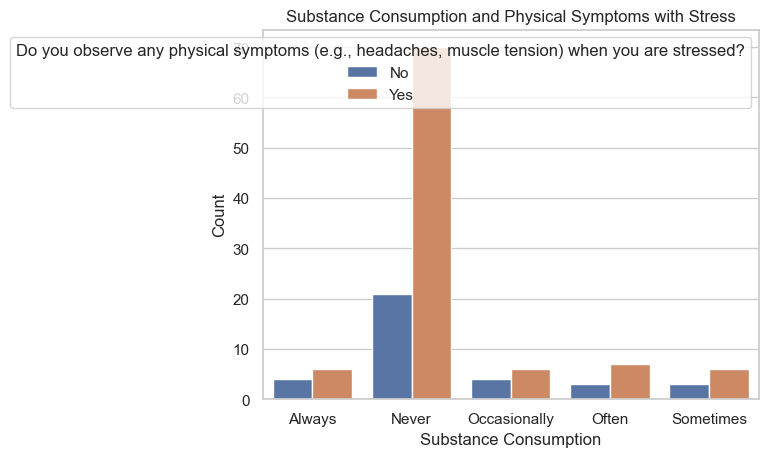

In [32]:
sns.countplot(x='How often do you partake in substance consumption, such as alcohol and tobacco?', hue='Do you observe any physical symptoms (e.g., headaches, muscle tension) when you are stressed?', data=df)
plt.title('Substance Consumption and Physical Symptoms with Stress')
plt.xlabel('Substance Consumption')
plt.ylabel('Count')
plt.show()



C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



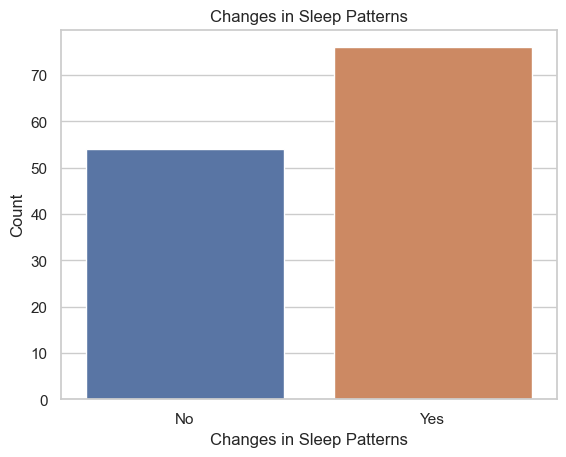

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



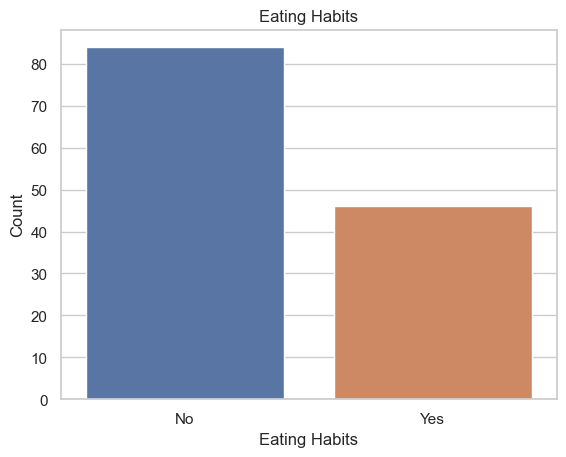

In [33]:
# Sleep patterns
sns.countplot(x='Have you noticed any changes in your sleep patterns that may be related to your emotional state  ?', data=df)
plt.title('Changes in Sleep Patterns')
plt.xlabel('Changes in Sleep Patterns')
plt.ylabel('Count')
plt.show()

# Eating habits
sns.countplot(x='How would you describe your eating habits? Do you eat in a balanced way?', data=df)
plt.title('Eating Habits')
plt.xlabel('Eating Habits')
plt.ylabel('Count')
plt.show()

## SOCIAL RELATIONSHIPS Analysis

* Visualization of Social Relationship Ratings

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



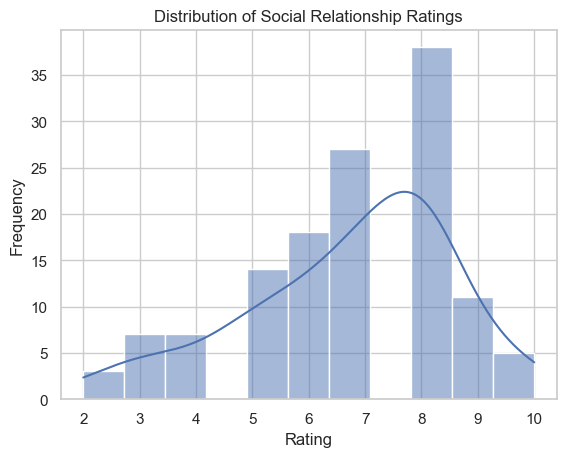

In [34]:


sns.histplot(df['How would you rate the quality of your social relationships?'], kde=True)
plt.title('Distribution of Social Relationship Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


* Analyze count of support systems

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



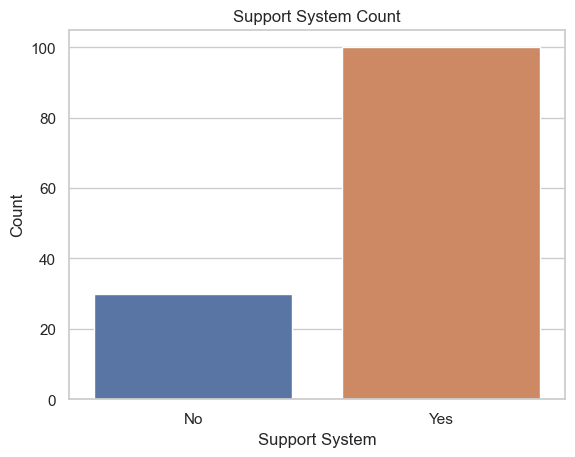

In [35]:

sns.countplot(x='Do you feel that you have a support system (e.g., friends, mentors) that you can turn to when you’re feeling stressed or down?', data=df)
plt.title('Support System Count')
plt.xlabel('Support System')
plt.ylabel('Count')
plt.show()


* Relationship between Involvement Influence Rating and Social Relationship Rating

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



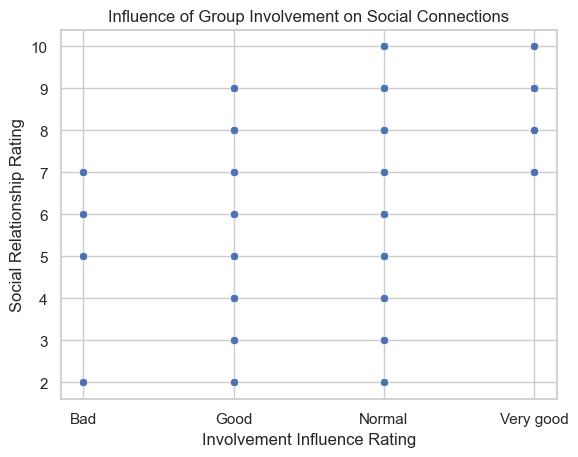

In [36]:

sns.scatterplot(x='How would you rate how involvement in such groups influenced your social connections?', y='How would you rate the quality of your social relationships?', data=df)
plt.title('Influence of Group Involvement on Social Connections')
plt.xlabel('Involvement Influence Rating')
plt.ylabel('Social Relationship Rating')
plt.show()


* Analyze coping strategies

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



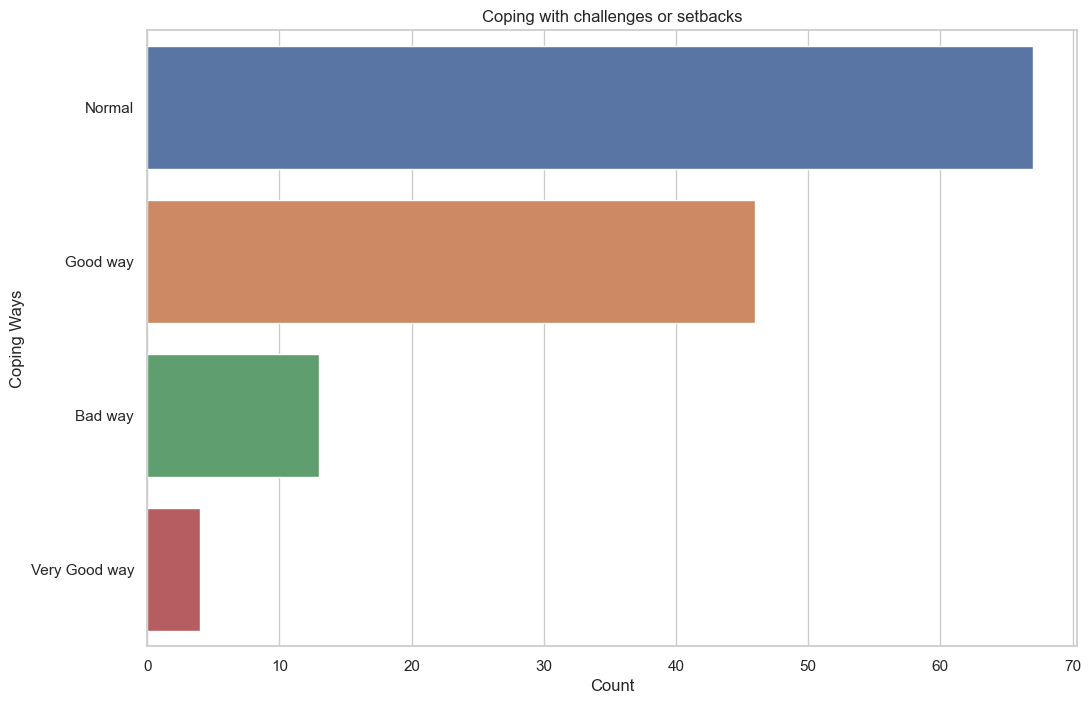

In [37]:

plt.figure(figsize=(12, 8))
sns.countplot(y='How do you typically cope with challenges or setbacks in your academic and personal life?', data=df, order=df['How do you typically cope with challenges or setbacks in your academic and personal life?'].value_counts().index)
plt.title('Coping with challenges or setbacks')
plt.xlabel('Count')
plt.ylabel('Coping Ways')
plt.show()



C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



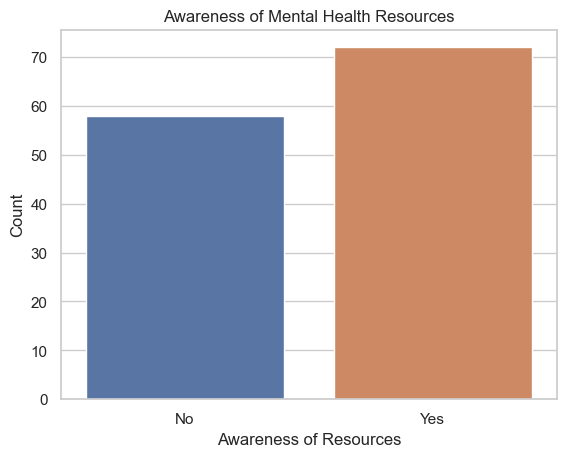

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



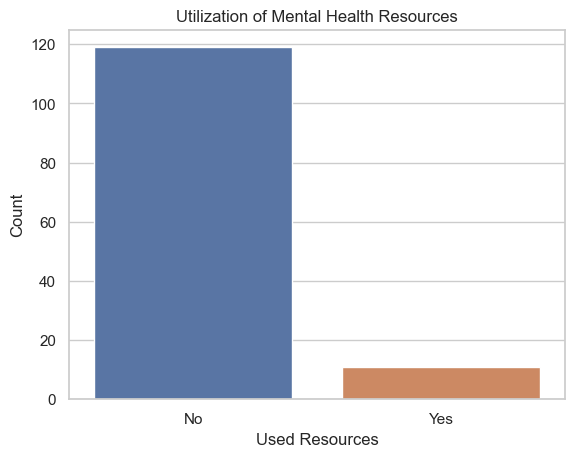

In [38]:
# Analyze awareness of resources
sns.countplot(x='Are you aware of the mental health resources available at your school (e.g., counseling services, support groups)? ', data=df)
plt.title('Awareness of Mental Health Resources')
plt.xlabel('Awareness of Resources')
plt.ylabel('Count')
plt.show()

# Analysis of resource utilization
sns.countplot(x='If yes, have you ever used these resources?', data=df)
plt.title('Utilization of Mental Health Resources')
plt.xlabel('Used Resources')
plt.ylabel('Count')
plt.show()


* Relationship between Coping Strategies and Emotional Resilience Skills

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



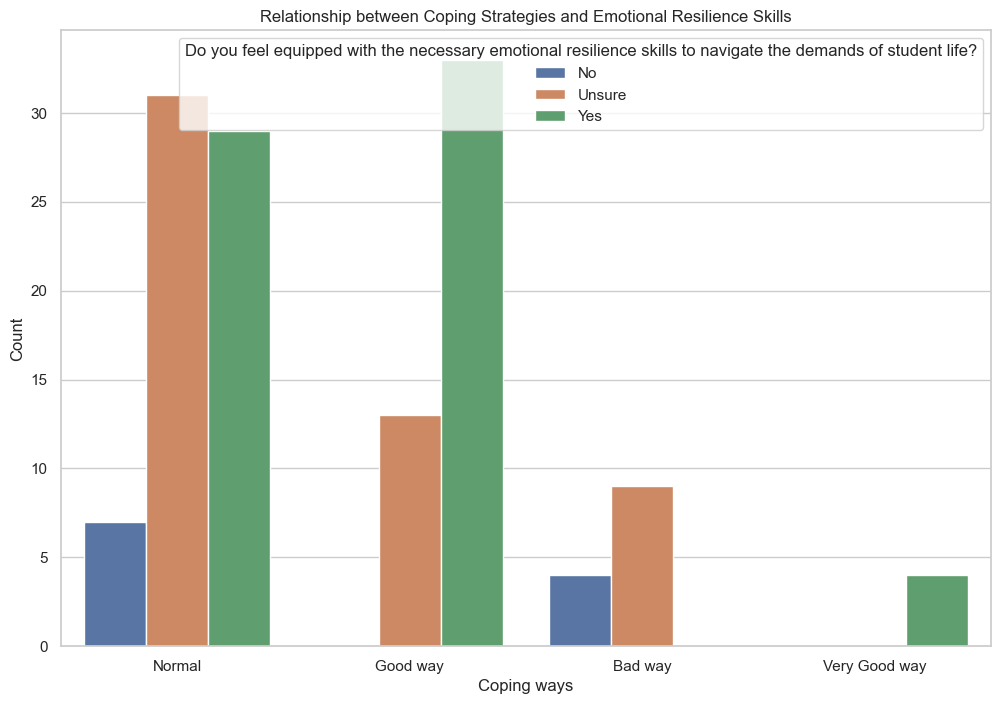

In [39]:

plt.figure(figsize=(12, 8))
sns.countplot(x='How do you typically cope with challenges or setbacks in your academic and personal life?', hue='Do you feel equipped with the necessary emotional resilience skills to navigate the demands of student life?', data=df, order=df['How do you typically cope with challenges or setbacks in your academic and personal life?'].value_counts().index)
plt.title('Relationship between Coping Strategies and Emotional Resilience Skills')
plt.xlabel('Coping ways')
plt.ylabel('Count')
plt.show()


C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



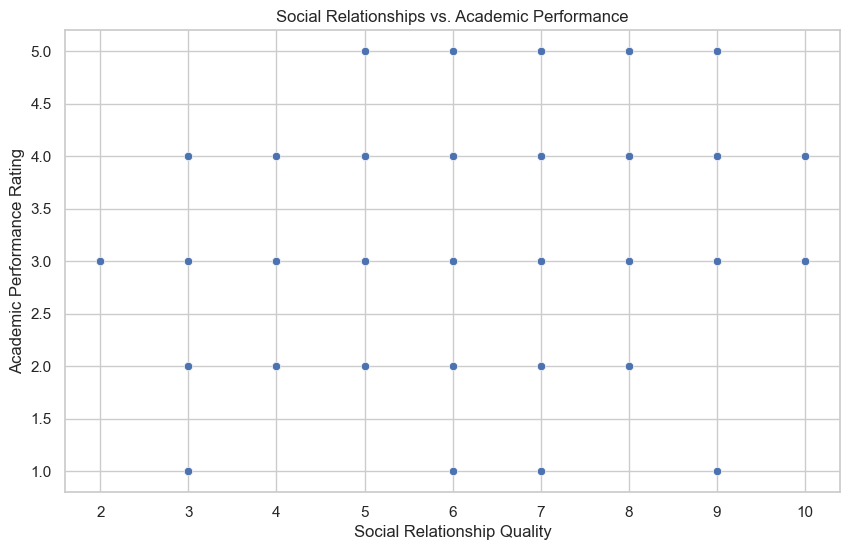

Correlation between Social Relationships and Academic Performance: 0.2427974435718616


In [40]:
# Scatter plot of Social Relationships vs. Academic Performance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='How would you rate the quality of your social relationships?', y='How would you rate your academic performance?', data=df)
plt.title('Social Relationships vs. Academic Performance')
plt.xlabel('Social Relationship Quality')
plt.ylabel('Academic Performance Rating')
plt.show()

# Correlation analysis
correlation_social_academic = df['How would you rate the quality of your social relationships?'].corr(df['How would you rate your academic performance?'])
print(f'Correlation between Social Relationships and Academic Performance: {correlation_social_academic}')


# Correlation
is a statistical measure that describes the extent to which two variables change together. Let's delve deeper into what a correlation coefficient means and when a correlation is considered "good" or "not good."

Correlation Coefficient:
Range: The correlation coefficient ranges from -1 to 1.
Magnitude:
Close to 1: Strong positive correlation. As one variable increases, the other tends to increase.
Close to -1: Strong negative correlation. As one variable increases, the other tends to decrease.
Close to 0: Weak or no linear correlation.

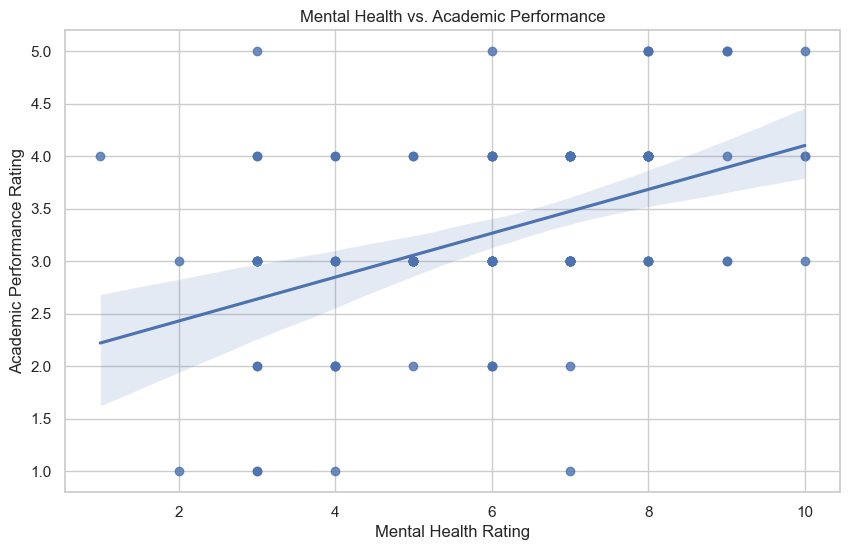

Correlation between Mental Health and Academic Performance: 0.4574823897571811


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Mental Health vs. Academic Performance
plt.figure(figsize=(10, 6))
sns.regplot(x='On a scale of 1 to 10, how would you rate your overall mental health? ', y='How would you rate your academic performance?', data=df)
plt.title('Mental Health vs. Academic Performance')
plt.xlabel('Mental Health Rating')
plt.ylabel('Academic Performance Rating')
plt.show()

# Correlation analysis
correlation_mental_academic = df['On a scale of 1 to 10, how would you rate your overall mental health? '].corr(df['How would you rate your academic performance?'])
print(f'Correlation between Mental Health and Academic Performance: {correlation_mental_academic}')


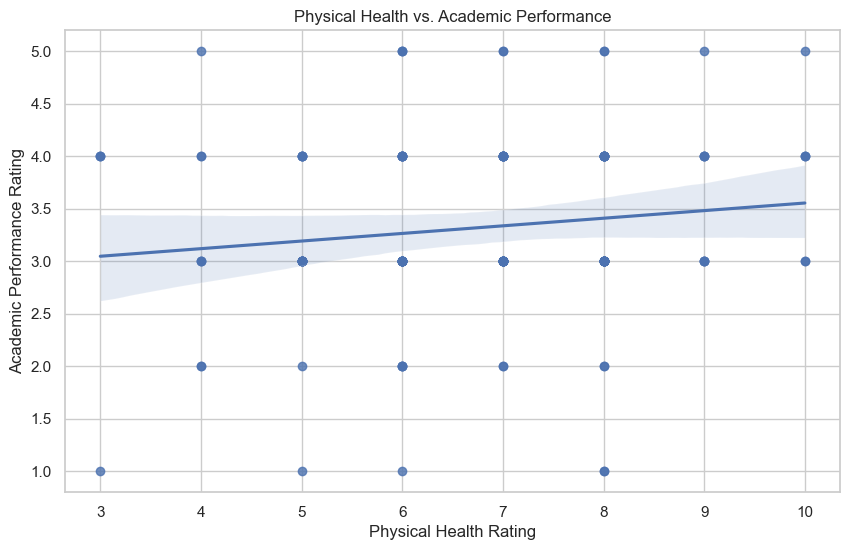

Correlation between Physical Health and Academic Performance: 0.134487101443173


In [42]:
# Scatter plot of Physical Health vs. Academic Performance
plt.figure(figsize=(10, 6))
sns.regplot(x='On a scale of 1 to 10, how would you rate your overall physical health? ', y='How would you rate your academic performance?', data=df)
plt.title('Physical Health vs. Academic Performance')
plt.xlabel('Physical Health Rating')
plt.ylabel('Academic Performance Rating')
plt.show()

# Correlation analysis
correlation_physical_academic = df['On a scale of 1 to 10, how would you rate your overall physical health? '].corr(df['How would you rate your academic performance?'])
print(f'Correlation between Physical Health and Academic Performance: {correlation_physical_academic}')


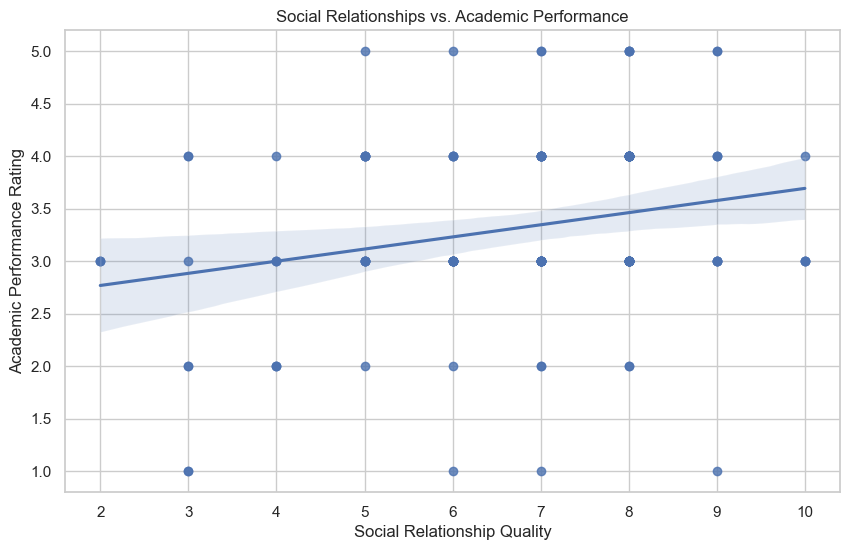

Correlation between Social Relationships and Academic Performance: 0.2427974435718616


In [43]:
# Scatter plot of Social Relationships vs. Academic Performance
plt.figure(figsize=(10, 6))
sns.regplot(x='How would you rate the quality of your social relationships?', y='How would you rate your academic performance?', data=df)
plt.title('Social Relationships vs. Academic Performance')
plt.xlabel('Social Relationship Quality')
plt.ylabel('Academic Performance Rating')
plt.show()

# Correlation analysis
correlation_social_academic = df['How would you rate the quality of your social relationships?'].corr(df['How would you rate your academic performance?'])
print(f'Correlation between Social Relationships and Academic Performance: {correlation_social_academic}')


C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\la7tim\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future ver

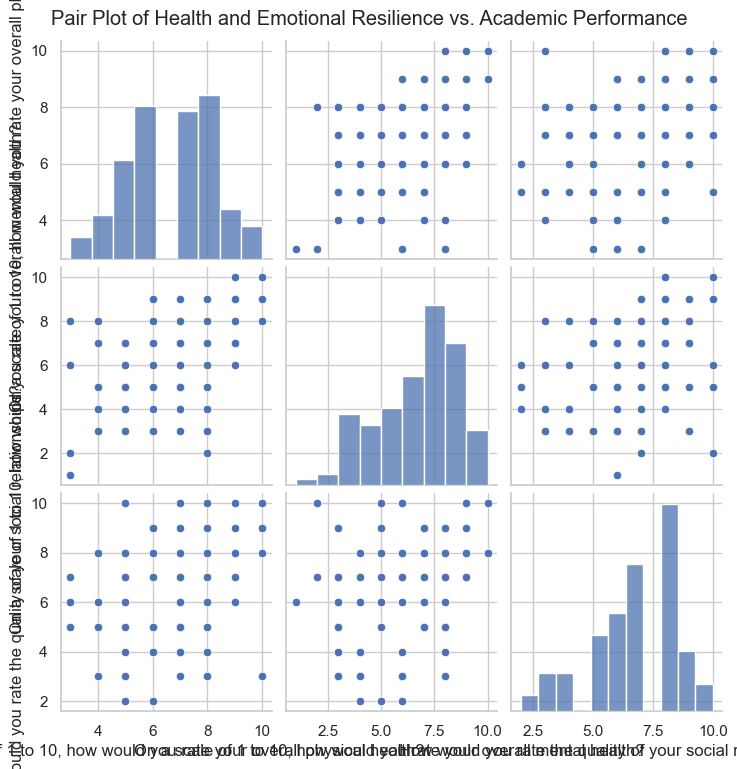

In [48]:

# Select relevant columns
selected_columns = ['On a scale of 1 to 10, how would you rate your overall physical health? ',
                    'On a scale of 1 to 10, how would you rate your overall mental health? ',
                    'How would you rate the quality of your social relationships?']

# Check if 'Emotional_Resilience_Numeric' is in the column names
if 'Emotional_Resilience_Numeric' in df.columns:
    selected_columns.append('Emotional_Resilience_Numeric')

# Create the selected DataFrame
selected_df = df[selected_columns]

# Convert to numeric
selected_df = selected_df.apply(pd.to_numeric, errors='coerce')

# Plot the pair plot
sns.pairplot(selected_df, kind='scatter', height=2.5)
plt.suptitle('Pair Plot of Health and Emotional Resilience vs. Academic Performance', y=1.02)  # Adjust title position
plt.show()


* Linear Regression Model

In [66]:
# 'How would you rate your academic performance' is the target variable
target_variable = 'How would you rate your academic performance?'


features = df[[
    'On a scale of 1 to 10, how would you rate your overall mental health? ',
    'On a scale of 1 to 10, how would you rate your overall physical health? ',
    'How would you rate the quality of your social relationships?',
    
]]


df_model = df.dropna(subset=[target_variable])

X = df_model[features.columns]
y = df_model[target_variable]


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [69]:
model.fit(X_train, y_train)


LinearRegression()

In [70]:
predictions = model.predict(X_test)


In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.9273547228233225
Mean Absolute Error: 0.7413169930881851
R-squared: -0.2613516954297106


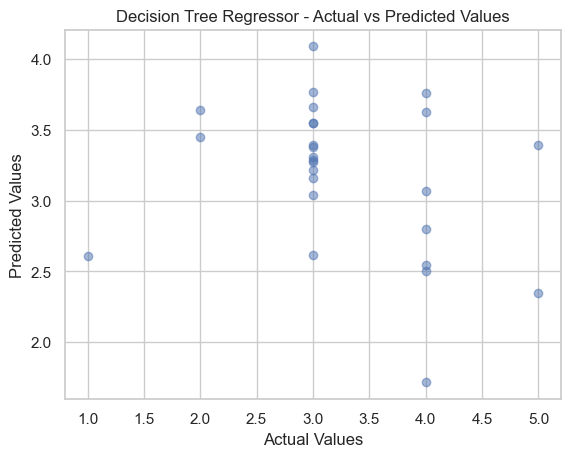

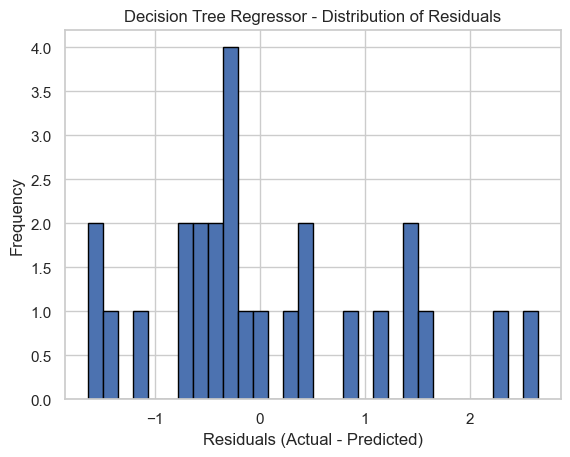

In [81]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regressor - Actual vs Predicted Values')
plt.show()

# Histogram of residuals
residuals = y_test - predictions
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Decision Tree Regressor - Distribution of Residuals')
plt.show()


The negative R-squared suggests that the linear regression model may not be suitable for capturing the relationships in your data. It could be that the relationships are non-linear or more complex than what a linear model can capture.

* Decision Tree Model

In [72]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()


columns_to_encode = [
    'How often do you feel stressed?',
    'How often do you feel anxious or worried?',
    'How often do you feel down, depressed, or hopeless?',
    'How often do you engage in physical activities (e.g., exercise, sports)?',
    'How often do you engage in activities that you enjoy (e.g., hobbies, relaxation, entertainment)?',
    'Have you observed any changes in your appetite that might be linked to your emotional state?',
    'How often do you partake in substance consumption, such as alcohol and tobacco?',
    'How would you assess the quality of your social relationships with your peers?',
    'Do you feel a sense of belonging within your academic community?'
]


for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])




In [74]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder


target_variable = 'How would you rate your academic performance?'


features = [
    'How often do you feel stressed?',
    'How often do you feel anxious or worried?',
    'How often do you feel down, depressed, or hopeless?',
    'How often do you engage in physical activities (e.g., exercise, sports)?',
    'How often do you engage in activities that you enjoy (e.g., hobbies, relaxation, entertainment)?',
    'Have you observed any changes in your appetite that might be linked to your emotional state?',
    'How often do you partake in substance consumption, such as alcohol and tobacco?',
    'How would you assess the quality of your social relationships with your peers?',
    'Do you feel a sense of belonging within your academic community?'
]


label_encoder = LabelEncoder()
for column in features:
    df[column] = label_encoder.fit_transform(df[column])


df_model = df.dropna(subset=[target_variable])


X = df_model[features]
y = df_model[target_variable]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.6153846153846154
Mean Absolute Error: 0.9230769230769231
R-squared: -1.1971830985915495


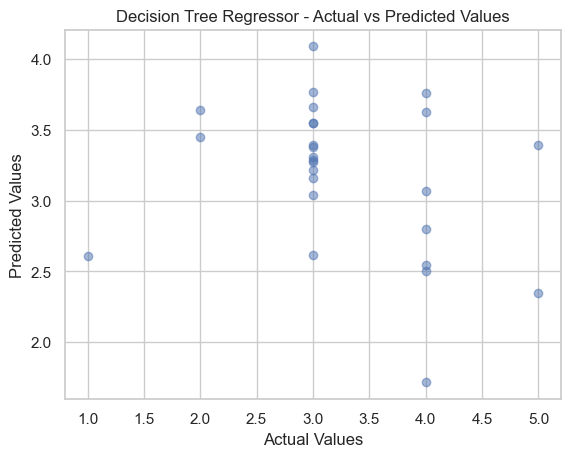

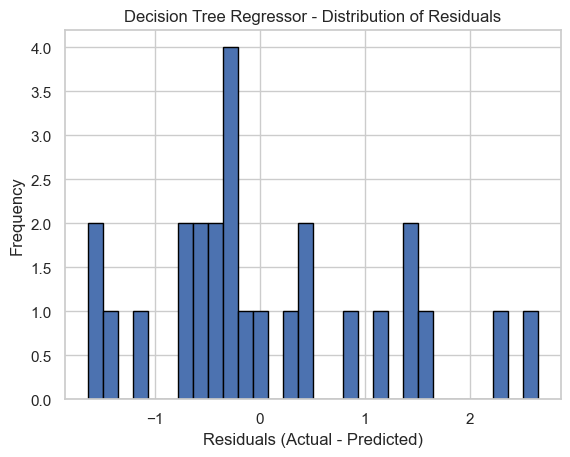

In [80]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regressor - Actual vs Predicted Values')
plt.show()

# Histogram of residuals
residuals = y_test - predictions
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Decision Tree Regressor - Distribution of Residuals')
plt.show()


The relatively high MSE and MAE values suggest that the model's predictions have a significant amount of error.
The negative R-squared indicates that the model is not explaining the variance in the target variable, and it's performing worse than a model that simply predicts the mean.

* Random Forest Regressor Model

In [76]:
from sklearn.ensemble import RandomForestRegressor


target_variable = 'How would you rate your academic performance?'


features = [
    'How often do you feel stressed?',
    'How often do you feel anxious or worried?',
    'How often do you feel down, depressed, or hopeless?',
    'How often do you engage in physical activities (e.g., exercise, sports)?',
    'How often do you engage in activities that you enjoy (e.g., hobbies, relaxation, entertainment)?',
    'Have you observed any changes in your appetite that might be linked to your emotional state?',
    'How often do you partake in substance consumption, such as alcohol and tobacco?',
    'How would you assess the quality of your social relationships with your peers?',
    'Do you feel a sense of belonging within your academic community?'
]


label_encoder = LabelEncoder()
for column in features:
    df[column] = label_encoder.fit_transform(df[column])

df_model = df.dropna(subset=[target_variable])

X = df_model[features]
y = df_model[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.257576342948718
Mean Absolute Error: 0.8846346153846153
R-squared: -0.7105062531857815


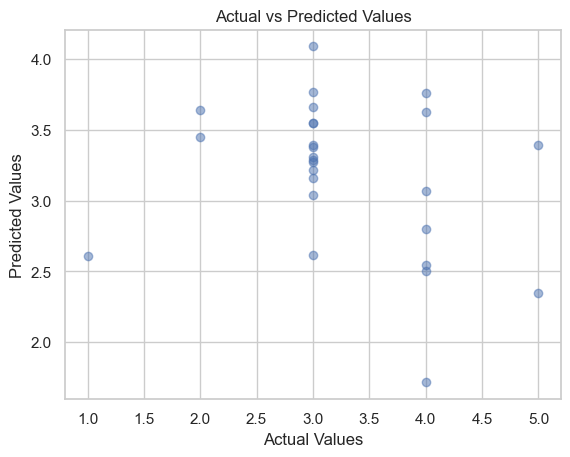

In [78]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


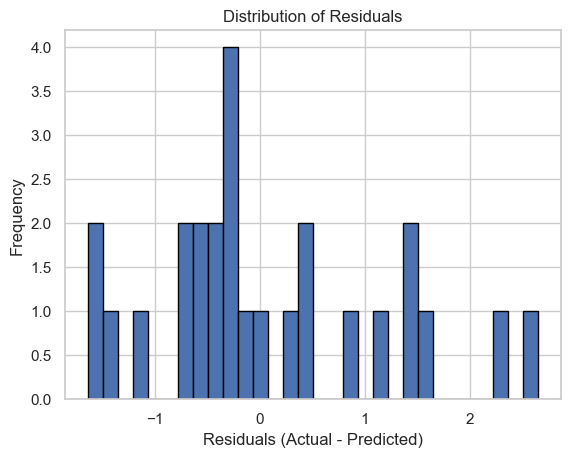

In [79]:
# Histogram of residuals
residuals = y_test - predictions
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


The MSE and MAE values, while not extremely high, still indicate a notable level of prediction error.
The negative R-squared suggests that the model is not explaining the variance in the target variable, and it's performing worse than a model that simply predicts the mean.